# Exploratory Analysis for Cleaned YSET Data

Date: 06/25/2019

## Unit and Data Import

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
## Import data set
cleaned_filepath = 'YSET_Dec2008_Dec2019_cleaned20190531.csv'
#key_filepath = 'YSET_Data/YSET_key_20190509.csv'

#key = pd.read_csv(key_filepath)
#key = key.set_index('key')

df = pd.read_csv(cleaned_filepath)
df.head()

FileNotFoundError: [Errno 2] File b'YSET_Dec2008_Dec2019_cleaned20190531.csv' does not exist: b'YSET_Dec2008_Dec2019_cleaned20190531.csv'

In [36]:
df.shape

(32896, 394)

## Basic Exploration of Data

### Risk Factor

In [37]:
df['y_TotalFactors'] = pd.to_numeric(df['y_TotalFactors'], downcast = 'integer', errors = 'coerce')
df.loc[(df['y_TotalFactors'] == 88), 'y_TotalFactors'] = np.nan
df['y_TotalFactors'].describe(percentiles = [.25, .5, .75])

count    31902.000000
mean         3.379945
std          2.732965
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          9.000000
Name: y_TotalFactors, dtype: float64

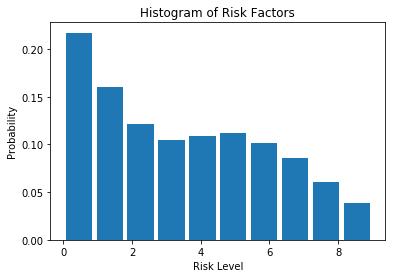

In [38]:
plt.hist(df['y_TotalFactors'],density = True, rwidth=0.85)
plt.xlabel('Risk Level')
plt.ylabel('Probability')
plt.title('Histogram of Risk Factors')
plt.show()

### Unique ID

In [40]:
df['UniqueID'] = pd.to_numeric(df['UniqueID'], downcast = 'integer', errors = 'coerce')

In [41]:
# Number of unique individuals who have ever submitted a response 

df.UniqueID.value_counts().describe()

count    22567.000000
mean         1.457704
std          0.717323
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: UniqueID, dtype: float64

In [42]:
# IDs with different numbers of snapshots

ID_6 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 6].index
ID_5 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 5].index
ID_4 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 4].index
ID_3 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 3].index
ID_2 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 2].index
ID_1 = df.UniqueID.value_counts()[df.UniqueID.value_counts() == 1].index

## Cleaning up outlier entries in data

### Section IJ

In [43]:
df['Score_ScaleIJ_new'] = 0

for col in df.loc[:,'ij40_6mos_combo':'ij56_ever_combo'].columns.tolist():
    
    df[col] = pd.to_numeric(df[col], downcast = 'integer', errors = 'coerce')
    df = df[df[col] != -1]
    df = df[df[col] != 11]# drop

    df.loc[(df[col] == 99), col] = np.nan
    df.loc[(df[col] == 9), col] = np.nan
    
    df['Score_ScaleIJ_new'] += df[col]
    
    #print(df[col].value_counts())

### Section Norms (Groups of Friends)

In [44]:
df['EG85a']=pd.to_numeric(df['EG85a'], downcast = 'integer', errors = 'coerce')
df['EG80']=pd.to_numeric(df['EG80'], downcast = 'integer', errors = 'coerce')
df['EG81']=pd.to_numeric(df['EG81'], downcast = 'integer', errors = 'coerce')
df['EG84']=pd.to_numeric(df['EG84'], downcast = 'integer', errors = 'coerce')

In [45]:
# Removing rows w invalid inputs 

# EG80
df = df[df.EG80 != -1]
df = df[df.EG80 != 3]
df = df[df.EG80 != 2]
df = df[df.EG80 != 11]
df = df[df.EG80 != 33]# drop

df.loc[(df['EG80'] == 99), 'EG80'] = np.nan
df.loc[(df['EG80'] == 999), 'EG80'] = np.nan
df.loc[(df['EG80'] == 9), 'EG80'] = np.nan


# EG81
df = df[df.EG81 != 11]# drop

df.loc[(df['EG81'] == 99), 'EG81'] = np.nan
df.loc[(df['EG81'] == 999), 'EG81'] = np.nan
df.loc[(df['EG81'] == 9), 'EG81'] = np.nan

# EG84
df.loc[(df['EG84'] == 99), 'EG84'] = np.nan
df.loc[(df['EG84'] == 999), 'EG84'] = np.nan
df.loc[(df['EG84'] == 9), 'EG84'] = np.nan

# EG85a
df.loc[(df['EG85a'] == 99), 'EG85a'] = np.nan
df.loc[(df['EG85a'] == 9), 'EG85a'] = np.nan


In [46]:
# Add up the scores

df['Score_ScaleNorms'] = df['EG80'] + df['EG81']+ df['EG84'] + df['EG85a']

In [47]:
df['Score_ScaleNorms'].value_counts()

0.0    18267
1.0     3563
2.0     3240
3.0     1394
4.0      402
Name: Score_ScaleNorms, dtype: int64

## Creating Dataframes for Analysis

In [48]:
# Extracting score scales from cleaned data
df_byfac =df.loc[:,'Score_ScaleA':'Score_ScaleNorms']
df_byfac.drop(['Score_ScaleIJMissing','Score_ScaleIJWithGangMissing'],axis = 1,inplace=True)
for col in df_byfac:
     df_byfac[col] = pd.to_numeric(df_byfac[col], downcast = 'integer', errors = 'coerce')
        
df['y_DateS1_Interview'] = pd.to_datetime(df['y_DateS1_Interview'], errors='coerce')        
df_byfac['Date'] = df['y_DateS1_Interview']

df_byfac['Age'] = df['Age']
df_byfac['Score_ScaleIJ_new'] = df['Score_ScaleIJ_new']
df_byfac['UniqueID'] = df['UniqueID']

# Moving Unique ID to the front
cols = df_byfac.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_byfac = df_byfac[cols]


In [49]:
df_byfac.head()

,UniqueID,Score_ScaleA,Score_ScaleB,Score_ScaleC,Score_ScaleDE,Score_ScaleF,Score_ScaleFS,Score_ScaleG,Score_ScaleH,Score_ScaleIJ,Score_ScaleK,Score_ScaleP,Score_ScaleT,Score_ScaleNorms,Date,Age,Score_ScaleIJ_new
0,1010,12.0,11.0,4.0,15.0,17.0,NaN,8.0,15.0,2,NaN,NaN,NaN,NaN,2010-05-13,16,5.0
1,1010,13.0,7.0,0.0,11.0,17.0,NaN,5.0,6.0,5,13.0,NaN,0.0,NaN,2011-07-28,18,9.0
2,1042,12.0,10.0,4.0,13.0,21.0,NaN,17.0,26.0,6,NaN,NaN,2.0,NaN,2011-09-27,18,12.0
3,1043,19.0,15.0,1.0,14.0,24.0,NaN,18.0,24.0,10,NaN,NaN,2.0,NaN,2010-05-17,15,17.0
4,1043,13.0,9.0,1.0,13.0,19.0,NaN,13.0,15.0,10,13.0,NaN,NaN,2.0,2011-07-27,16,12.0


### WE FIGURED OUT WHEN THEY STARTED TO ASK FS QUESTIONS!!!
- We will split the data into two: one before the key date (2013-11-1, when they changed the questionnaire) and one after.

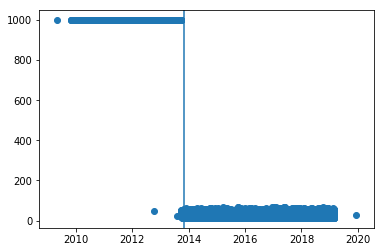

In [50]:
import time
from datetime import date

keydate = date(2013, 11, 1)

df_byfac.Score_ScaleFS[df_byfac['Score_ScaleFS'].isna()] = 999

plt.scatter(x=df_byfac.Date,y=df_byfac.Score_ScaleFS)
plt.axvline(x=keydate)
plt.show()

df_byfac.loc[(df_byfac['Score_ScaleFS'] == 999), 'Score_ScaleFS'] = np.nan


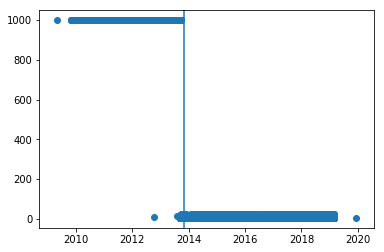

In [51]:
df_byfac.Score_ScaleP[df_byfac['Score_ScaleP'].isna()] = 999

plt.scatter(x=df_byfac.Date,y=df_byfac.Score_ScaleP)
plt.axvline(x=keydate)
plt.show()

df_byfac.loc[(df_byfac['Score_ScaleP'] == 999), 'Score_ScaleP'] = np.nan

### Split data up into "Before Keydate" and "After Keydate"

In [52]:
# Before keydate

df_bkey = df_byfac[df_byfac.Date < keydate]

# Drop questions that wasn't asked before keydate
df_bkey.drop(['Score_ScaleFS','Score_ScaleP'],axis = 1,inplace=True)

In [53]:
# After keydate 
df_akey = df_byfac[df_byfac.Date >= keydate]

## Linear Regression with Scales

### Before keydate

Things left to do:

- Model validity checking / Transformation
- **Plotting**
- Predictor selecting: mix and match?
- Explain meaning of the slopes

In [54]:
import statsmodels.api as sm

In [123]:
# list of colnames we are using as X
cnames = df_bkey.loc[:,'Score_ScaleA':'Score_ScaleH'].columns.tolist()
cnames.extend(df_bkey.loc[:,'Score_ScaleK':'Score_ScaleNorms'].columns.tolist())

df_bkey.dropna(inplace = True)

X_bkey = df_bkey[cnames]
y_bkey= df_bkey["Score_ScaleIJ_new"]
X_bkey = sm.add_constant(df_bkey[cnames])

In [124]:
X_bkey.head()

,const,Score_ScaleA,Score_ScaleB,Score_ScaleC,Score_ScaleDE,Score_ScaleF,Score_ScaleG,Score_ScaleH,Score_ScaleK,Score_ScaleT,Score_ScaleNorms
6,1.0,11.0,7.0,2.0,10.0,15.0,18.0,14.0,14.0,1.0,0.0
10,1.0,15.0,4.0,2.0,15.0,15.0,15.0,20.0,17.0,1.0,0.0
14,1.0,16.0,5.0,5.0,13.0,18.0,15.0,11.0,20.0,0.0,3.0
22,1.0,11.0,10.0,2.0,11.0,20.0,12.0,15.0,16.0,0.0,0.0
34,1.0,9.0,5.0,4.0,10.0,12.0,7.0,9.0,13.0,1.0,1.0


In [125]:
# Note the difference in argument order
model_bkey = sm.OLS(y_bkey, X_bkey).fit()
predictions_bkey = model_bkey.predict(X_bkey) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     615.8
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:55:44   Log-Likelihood:                -14070.
No. Observations:                5225   AIC:                         2.816e+04
Df Residuals:                    5214   BIC:                         2.823e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.5634      0.229    -24.305      0.000      -6.012      -5.115
Score_ScaleA        -0.0031      0.017     -0.181      0.856      -0.036       0.030
Score_ScaleB         0.1228      0.019      6.421      0.000       0.085       0.160
Score_ScaleC         0.2905      0.033      8.773      0.000       0.226       0.355
Score_ScaleDE        0.0685      0.020      3.383      0.001       0.029       0.108
Score_ScaleF         0.2005      0.016     12.326      0.000       0.169       0.232
Score_ScaleG         0.0338      0.013      2.663      0.008       0.009       0.059
Score_ScaleH         0.3155      0.015     21.463      0.000       0.287       0.344
Score_ScaleK         0.0283      0.010      2.702      0.007       0.008       0.049
Score_ScaleT         0.4981      0.089      5.570      0.000       0.323       0.673
Score_ScaleNorms     1.3307      0.058     22.762      0.000       1.216       1.445
==============================================================================
Omnibus:                      446.686   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              839.523
Skew:                           0.590   Prob(JB):                    5.01e-183
Kurtosis:                       4.570   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Simple Linear Regressions of Significant Sections to IJ After Keydate

#### Running Simple Linear Regression on Each 'Feature' 


In [164]:
#Score_ScaleB vs Score_ScaleIJ_new
X_bkey1 = df_bkey['Score_ScaleB']
y_bkey1= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey1, X_bkey1).fit()
predictions_bkey = model_bkey.predict(X_bkey1) # make the predictions by the model

# Print out the statistics
model_bkey.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9321.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:15   Log-Likelihood:                -15649.
No. Observations:                5225   AIC:                         3.130e+04
Df Residuals:                    5224   BIC:                         3.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleB     0.8772      0.009     96.547      0.000       0.859       0.895
==============================================================================
Omnibus:                      535.899   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.905
Skew:                           0.770   Prob(JB):                    1.65e-175
Kurtosis:                       4.152   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#Score_ScaleC vs Score_ScaleIJ_new
X_bkey2 = df_bkey['Score_ScaleC']
y_bkey2= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey2, X_bkey2).fit()
predictions_bkey = model_bkey.predict(X_bkey2) # make the predictions by the model

# Print out the statistics
model_bkey.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     9038.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:05:18   Log-Likelihood:                -15700.
No. Observations:                5225   AIC:                         3.140e+04
Df Residuals:                    5224   BIC:                         3.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleC     1.7063      0.018     95.068      0.000       1.671       1.742
==============================================================================
Omnibus:                      569.343   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.938
Skew:                           0.815   Prob(JB):                    3.34e-184
Kurtosis:                       4.105   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#Score_ScaleDE vs Score_ScaleIJ_new
X_bkey3 = df_bkey['Score_ScaleDE']
y_bkey3= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey3, X_bkey3).fit()
predictions_bkey = model_bkey.predict(X_bkey3) # make the predictions by the model

# Print out the statistics
model_bkey.summary()
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:28   Log-Likelihood:                -15477.
No. Observations:                5225   AIC:                         3.096e+04
Df Residuals:                    5224   BIC:                         3.096e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Score_ScaleDE     0.4976      0.005    101.533      0.000       0.488       0.507
==============================================================================
Omnibus:                      845.951   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1481.684
Skew:                           1.045   Prob(JB):                         0.00
Kurtosis:                       4.561   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
#Score_ScaleF vs Score_ScaleIJ_new
X_bkey4 = df_bkey['Score_ScaleF']
y_bkey4= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey4, X_bkey4).fit()
predictions_bkey = model_bkey.predict(X_bkey4) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.108e+04
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -15350.
No. Observations:                5225   AIC:                         3.070e+04
Df Residuals:                    5224   BIC:                         3.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleF     0.3727      0.004    105.266      0.000       0.366       0.380
==============================================================================
Omnibus:                      846.974   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1468.945
Skew:                           1.052   Prob(JB):                         0.00
Kurtosis:                       4.523   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#Score_ScaleG vs Score_ScaleIJ_new
X_bkey5= df_bkey['Score_ScaleG']
y_bkey5= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey5, X_bkey5).fit()
predictions_bkey = model_bkey.predict(X_bkey5) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     9341.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:39   Log-Likelihood:                -15645.
No. Observations:                5225   AIC:                         3.129e+04
Df Residuals:                    5224   BIC:                         3.130e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleG     0.4975      0.005     96.648      0.000       0.487       0.508
==============================================================================
Omnibus:                      667.135   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.045
Skew:                           0.878   Prob(JB):                    2.70e-238
Kurtosis:                       4.394   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
#Score_ScaleH vs Score_ScaleIJ_new
X_bkey6= df_bkey['Score_ScaleH']
y_bkey6= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey6, X_bkey6).fit()
predictions_bkey = model_bkey.predict(X_bkey6) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.343e+04
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:44   Log-Likelihood:                -14999.
No. Observations:                5225   AIC:                         3.000e+04
Df Residuals:                    5224   BIC:                         3.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleH     0.5601      0.005    115.873      0.000       0.551       0.570
==============================================================================
Omnibus:                      560.605   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.978
Skew:                           0.826   Prob(JB):                    4.32e-175
Kurtosis:                       3.981   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
#Score_ScaleK vs Score_ScaleIJ_new
X_bkey7 = df_bkey['Score_ScaleK']
y_bkey7= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey7, X_bkey7).fit()
predictions_bkey = model_bkey.predict(X_bkey7) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8765.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:51   Log-Likelihood:                -15751.
No. Observations:                5225   AIC:                         3.150e+04
Df Residuals:                    5224   BIC:                         3.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleK     0.3737      0.004     93.620      0.000       0.366       0.381
==============================================================================
Omnibus:                      724.494   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5275.366
Skew:                           0.447   Prob(JB):                         0.00
Kurtosis:                       7.841   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
#Score_ScaleT vs Score_ScaleIJ_new
X_bkey8 = df_bkey['Score_ScaleT']
y_bkey8= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey8, X_bkey8).fit()
predictions_bkey = model_bkey.predict(X_bkey8) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     2530.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:10:55   Log-Likelihood:                -17292.
No. Observations:                5225   AIC:                         3.459e+04
Df Residuals:                    5224   BIC:                         3.459e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Score_ScaleT     6.5813      0.131     50.302      0.000       6.325       6.838
==============================================================================
Omnibus:                      197.611   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.885
Skew:                           0.415   Prob(JB):                     3.32e-55
Kurtosis:                       3.681   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
#Score_ScaleNorms vs Score_ScaleIJ_new
X_bkey9 = df_bkey['Score_ScaleNorms']
y_bkey9= df_bkey["Score_ScaleIJ_new"]

# Note the difference in argument order
model_bkey = sm.OLS(y_bkey9, X_bkey9).fit()
predictions_bkey = model_bkey.predict(X_bkey9) # make the predictions by the model

# Print out the statistics
model_bkey.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Score_ScaleIJ_new   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     6303.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:11:02   Log-Likelihood:                -16256.
No. Observations:                5225   AIC:                         3.251e+04
Df Residuals:                    5224   BIC:                         3.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Score_ScaleNorms     4.7189      0.059     79.392      0.000       4.602       4.835
==============================================================================
Omnibus:                      156.928   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.285
Skew:                           0.161   Prob(JB):                     2.35e-76
Kurtosis:                       4.223   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

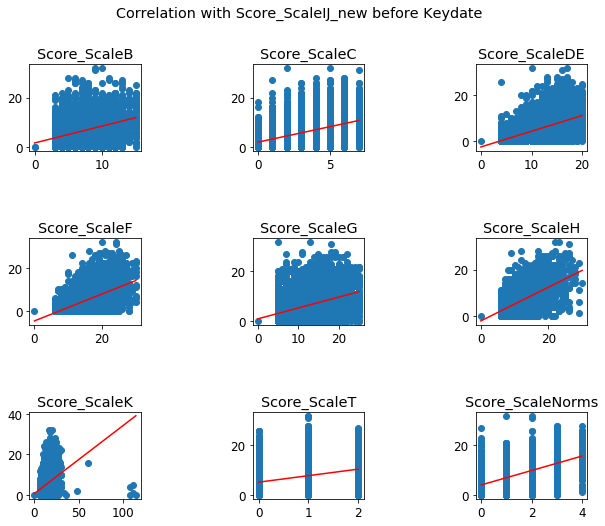

In [172]:
font = {'family' : 'DejaVu Sans',
  'size' : 12}
plt.rc('font', **font)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8

#Score_ScaleB vs Score_ScaleIJ_new
ax0 = plt.subplot(331)
ax0.get_xaxis().set_label_position('bottom')
ax0.set_title("Score_ScaleB")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey1,y_bkey1)
mn=np.min(X_bkey1)
mx=np.max(X_bkey1)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax0.scatter(X_bkey1,y_bkey1)
ax0.plot(x1,y1,'-r')

#Score_ScaleC vs Score_ScaleIJ_new
ax1 = plt.subplot(332)
ax1.get_xaxis().set_label_position('bottom')
ax1.set_title("Score_ScaleC")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey2,y_bkey2)
mn=np.min(X_bkey2)
mx=np.max(X_bkey2)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax1.scatter(X_bkey2,y_bkey2)
ax1.plot(x1,y1,'-r')

#Score_ScaleDE vs Score_ScaleIJ_new
ax2 = plt.subplot(333)
ax2.get_xaxis().set_label_position('bottom')
ax2.set_title("Score_ScaleDE")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey3,y_bkey3)
mn=np.min(X_bkey3)
mx=np.max(X_bkey3)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax2.scatter(X_bkey3,y_bkey3)
ax2.plot(x1,y1,'-r')

#Score_ScaleF vs Score_ScaleIJ_new
ax3 = plt.subplot(334)
ax3.get_xaxis().set_label_position('bottom')
ax3.set_title("Score_ScaleF")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey4,y_bkey4)
mn=np.min(X_bkey4)
mx=np.max(X_bkey4)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax3.scatter(X_bkey4,y_bkey4)
ax3.plot(x1,y1,'-r')

#Score_ScaleG vs Score_ScaleIJ_new
ax4 = plt.subplot(335)
ax4.get_xaxis().set_label_position('bottom')
ax4.set_title("Score_ScaleG")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey5,y_bkey5)
mn=np.min(X_bkey5)
mx=np.max(X_bkey5)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax4.scatter(X_bkey5,y_bkey5)
ax4.plot(x1,y1,'-r')

#Score_ScaleH vs Score_ScaleIJ_new
ax5 = plt.subplot(336)
ax5.get_xaxis().set_label_position('bottom')
ax5.set_title("Score_ScaleH")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey6,y_bkey6)
mn=np.min(X_bkey6)
mx=np.max(X_bkey6)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax5.scatter(X_bkey6,y_bkey6)
ax5.plot(x1,y1,'-r')

#Score_ScaleK vs Score_ScaleIJ_new
ax6 = plt.subplot(337)
ax6.get_xaxis().set_label_position('bottom')
ax6.set_title("Score_ScaleK")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey7,y_bkey7)
mn=np.min(X_bkey7)
mx=np.max(X_bkey7)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax6.scatter(X_bkey7,y_bkey7)
ax6.plot(x1,y1,'-r')

#Score_ScaleT vs Score_ScaleIJ_new
ax7 = plt.subplot(338)
ax7.get_xaxis().set_label_position('bottom')
ax7.set_title("Score_ScaleT")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey8,y_bkey8)
mn=np.min(X_bkey8)
mx=np.max(X_bkey8)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax7.scatter(X_bkey8,y_bkey8)
ax7.plot(x1,y1,'-r')

#Score_ScaleNorms vs Score_ScaleIJ_new
ax8 = plt.subplot(339)
ax8.get_xaxis().set_label_position('bottom')
ax8.set_title("Score_ScaleNorms")
gradient, intercept, r_value, p_value, std_err = stats.linregress(X_bkey9,y_bkey9)
mn=np.min(X_bkey9)
mx=np.max(X_bkey9)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
ax8.scatter(X_bkey9,y_bkey9)
ax8.plot(x1,y1,'-r')

plt.subplots_adjust(hspace=1, wspace=1) 
plt.suptitle("Correlation with Score_ScaleIJ_new before Keydate")

plt.show()


### After keydate

Things to do:

- Modelling with the same techniques as above but w/o dropping FS and P
- Be careful of NA handling!!

## Scratch Part

In [118]:
# Figuring out how many nan entries there are in the original data
a = X_bkey.Score_ScaleA - X_bkey.Score_ScaleA

for col in cnames:
    a += X_bkey[col]
    
a.isna().sum()

In [25]:
# Data frame with only questionnaire responses

df_question =df.loc[:,"a1_combo":"EG85a"]
df_question['UniqueID'] = df['UniqueID']
cols = df_question.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_question = df_question[cols]
df_question.head()

,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,b8_combo,b9_combo,...,eg77_most,eg77_no_group,eg77_oldest,eg77_youngest,EG83a,EG83b,EG83c,EG83d,EG83e,EG85a
0,1010,1.0,5.0,3.0,1.0,1.0,1.0,3.0,5.0,3.0,...,,,,,,,,,,NaN
1,1010,4.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,...,18,,25,18,9,9,9,9,,NaN
2,1042,2.0,2.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,...,,,,,,,,,,NaN
3,1043,4.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,...,,,,,,,,,,NaN
4,1043,2.0,3.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,...,18,,26,15,1,0,0,1,,1.0


## Aviva's Code for Data Cleaning

In [ ]:
df['y_DateS1_Interview'] = pd.to_datetime(df['y_DateS1_Interview'], errors='coerce')
df = df.sort_values(by=['y_DateS1_Interview'])

df['y_TotalFactors'] = pd.to_numeric(df['y_TotalFactors'], downcast='integer', errors='coerce')
df.loc[(df['y_TotalFactors'] == 88), 'y_TotalFactors'] = np.nan

df['Age'] = pd.to_numeric(df['Age'], downcast='integer', errors='coerce')
df.loc[(df['Age'] == 99), 'Age'] = np.nan

df['AgeYSET'] = pd.to_numeric(df['AgeYSET'], errors='coerce')
df.loc[(df['AgeYSET'] == 0), 'AgeYSET'] = np.nan

df['YSET_I_R'] = pd.to_numeric(df['YSET_I_R'], errors='coerce')
df['y_YSET_IR_Recoded'] = pd.to_numeric(df['y_YSET_IR_Recoded'], errors='coerce')

df['ETO_ID'] = pd.to_numeric(df['ETO_ID'], errors='coerce')
df['NewRootID'] = df['NewRootID'].replace(' ',np.NaN)
df['OldRootID'] = df['OldRootID'].replace(' ',np.NaN)
df['UniqueID'] = df['ETO_ID']
df = df[key.index]

## Validate/Fill in Risk Factor
# Raw responses
# See README.md for explanation of which questions are included
RF_qs = key.loc['a1_combo':'ij42_6mos_combo'].index.tolist() + key.loc['ij43_ever_combo':'ij56_ever_combo'].index.tolist()
raw_qs = key.loc['a1_combo':'ij56_gang'].index.tolist() + key.loc['ck90':'EG86b'].index.tolist() + key.loc['gm57_6mos_combo':'gm60a'].index.tolist() + key.loc['h36_1_new':'P5_new'].index.tolist() + key.loc['xr_L72_awarenessXX':'xr_m71_codeXX'].index.tolist() 
for q in raw_qs:
    df[q] = pd.to_numeric(df[q], errors='coerce')
    
scale_scores = key.loc['Score_ScaleA':'Score_ScaleNorms'].index.tolist()
for score in scale_scores:
    df[score] = pd.to_numeric(df[score], errors='coerce')
    
scale_concerns = key.loc['ScoreA':'ScoreT'].index.tolist()
for concern in scale_concerns:
    df[concern] = pd.to_numeric(df[concern], errors='coerce')
    df.loc[(df[concern] == 7), concern] = np.nan
scale_concerns.append('ScoreK')
df['ScoreK'] = pd.to_numeric(df['ScoreK'], errors='coerce')
df.loc[(df['ScoreK'] == 4), 'ScoreK'] = np.nan
scale_concerns.append('ScoreGroupFriends')
df['ScoreGroupFriends'] = pd.to_numeric(df['ScoreGroupFriends'], errors='coerce')
df.loc[(df['ScoreGroupFriends'] == 4), 'ScoreGroupFriends'] = np.nan

scale_flags = key.loc['y_ARISK_NY':'y_TRISK_NY'].index.tolist()
for flag in scale_flags:
    df[flag] = pd.to_numeric(df[flag], errors='coerce')
    
def scale_score_calculate(df):
    scale_a = np.sum(df.loc[:,'a1_combo':'a6_combo'], axis=1).rename('scale_a')
    scale_b = np.sum(df.loc[:,'b7_combo':'b9_combo'], axis=1).rename('scale_b')
    scale_c = np.sum(df.loc[:,'c10_combo':'c16_combo'], axis=1).rename('scale_c')
    scale_de = np.sum(df.loc[:,'de17_combo':'de20_combo'], axis=1).rename('scale_de')
    scale_f = np.sum(df.loc[:,'f21_combo':'f26_combo'], axis=1).rename('scale_f')
    scale_g = np.sum(df.loc[:,'g27_combo':'g31_combo'], axis=1).rename('scale_g')
    scale_h = np.sum(df.loc[:,'h32_combo':'h37_combo'], axis=1).rename('scale_h')
    scale_ij = np.sum(df.loc[:,RF_qs[39:]], axis=1).rename('scale_ij')
    scale_t = np.add((df.loc[:,'t38_combo'] > 1).astype(int),(df.loc[:,'t39_combo'] > 1).astype(int)).rename('scale_t')
    
    # Not used for risk factor
    scale_fs = np.sum(df.loc[:,'FS91':'FS104'], axis=1).rename('scale_fs')
    scale_k = np.sum(df.loc[:,'k61':'k66'], axis=1).rename('scale_k')
    scale_m = np.sum(df.loc[:,'xr_m67_codeXX':'xr_m71_codeXX'], axis=1).rename('scale_m')
    scale_l = np.sum(df.loc[:,'xr_L72_awarenessXX':'xr_L75_awarenessXX'], axis=1).rename('scale_l')
    scale_p = np.sum(df.loc[:, 'P1_new':'P5_new'], axis=1).rename('scale_p')
    scale_norms = np.sum(df.loc[:, 'EG80':'EG85a'], axis=1).rename('scale_norms')
    # scale_conv uses xr_n90_groupXX, not computing at this time. (but if I were, I'd do it here.)
    
    df2 = pd.concat([scale_a, scale_b, scale_c, scale_de, scale_f, scale_g, scale_h, scale_ij, scale_t, scale_fs, scale_k, scale_m, scale_l, scale_p, scale_norms], axis=1)
    return df2

scale_scores_constructed = ['scale_a', 'scale_b', 'scale_c', 'scale_de', 'scale_f', 'scale_g', 'scale_h', 'scale_ij', 'scale_t', 'scale_fs', 'scale_k', 'scale_p', 'scale_norms'] #skipping M and L because it doesn't exist in the dataset

calculated_scores = scale_score_calculate(df)
different = (df[scale_scores].values != calculated_scores[scale_scores_constructed].values)

for i in range(len(scale_scores_constructed)):
    print(scale_scores_constructed[i], np.sum(different, axis=0)[i])


## Check if all values of a key are covered
#target = 'ReferralSource'
#all_data = pd.to_numeric(df[target], errors='coerce')
#info = key[key['key']==target]
#values = literal_eval(info['values'].max())
#value_keys = [i[0] for i in values]
#
#present = all_data[np.isin(all_data, value_keys)]
#missing = all_data[~np.isin(all_data, value_keys)]
###test = df['y_YSET_InterviewDateRecorded']
##
##old = pd.read_csv('../data/YSET_Database_January_2014_Decebmer_2017_Clean_Data.csv')

## Compare YSET_I_R with y_YSET_IR_Recoded
# Number crunching
#intake_IR = sum(df['YSET_I_R'] < 10)
#retake_IR = sum(df['YSET_I_R'] >= 10)
#intake_recoded = sum(df['y_YSET_IR_Recoded'] == 1)
#retake_recoded = sum(df['y_YSET_IR_Recoded'] == 2)
#matching_IR = sum((df['YSET_I_R'] < 10) & (df['y_YSET_IR_Recoded'] == 1)) + sum((df['YSET_I_R'] >= 10) & (df['y_YSET_IR_Recoded'] == 2))
#can_fill = sum((df['YSET_I_R'] < 10) & (df['y_YSET_IR_Recoded'].isnull())) + sum((df['YSET_I_R'] >= 10) & (df['y_YSET_IR_Recoded'].isnull())) + sum((df['YSET_I_R'].isnull()) & (df['y_YSET_IR_Recoded'] == 1)) + sum((df['YSET_I_R'].isnull()) & (df['y_YSET_IR_Recoded'] == 2))

# Repopulate as many entries as possible (4)
df.loc[(df['YSET_I_R'] < 10) & (df['y_YSET_IR_Recoded'].isnull()), 'y_YSET_IR_Recoded'] = 1

# Drop all conflicting entries (56)
df = df.drop(df[(df['YSET_I_R'] < 10) & (df['y_YSET_IR_Recoded'] == 2)].index)
df = df.drop(df[(df['YSET_I_R'] >= 10) & (df['y_YSET_IR_Recoded'] == 1)].index)
df = df.dropna(subset=['YSET_I_R', 'y_YSET_IR_Recoded'])

## Construct UniqueID
#  1. From ETO_ID (high confidence of accuracy)
df.loc[(df['UniqueID'] == 0), 'UniqueID'] = np.nan
df.loc[(df['UniqueID'] == 88888), 'UniqueID'] = np.nan
df.loc[(df['UniqueID'] == 99999), 'UniqueID'] = np.nan

#current_count = sum(df['UniqueID'].notnull())  # 28,436

#  2. Recover missing ETO_ID using matching NewRootID entries, then OldRootID entries
def fill_nan(df, key='NewRootID', target='UniqueID'):
    df.loc[df.dropna(subset=[key]).index, target] = df.dropna(subset=[key]).groupby([key])[target].fillna(method='backfill')
    df.loc[df.dropna(subset=[key]).index, target] = df.dropna(subset=[key]).groupby([key])[target].fillna(method='ffill')
    return df

df = fill_nan(df, key='NewRootID', target='UniqueID')
#current_count = sum(df['UniqueID'].notnull()) # 28,478
df = fill_nan(df, key='OldRootID', target='UniqueID')
#current_count = sum(df['UniqueID'].notnull()) # 28,690

## If the same identifier has Y1s associated with it, drop all but the first
def drop_duplicate_Y1(df, key='ETO_ID'):
    test = (df[df['YSET_I_R'] == 1][key].duplicated(keep='first')) & (df[df['YSET_I_R'] == 1][key].notnull()) & ~(df['YSET_I_R'] != 1)
#    print(sum(test))
    df = df[~test]
    return df

df = drop_duplicate_Y1(df, key='UniqueID')    # drop 95
df = drop_duplicate_Y1(df, key='NewRootID')   # drop 8
df = drop_duplicate_Y1(df, key='OldRootID')   # drop 81

# Assign a four digit number to Y1 entries (guaranteed to correspond to one person due to previous steps)
number_assigned = df.loc[(df['YSET_I_R']==1) & (df['UniqueID'].isnull()),'UniqueID'].shape[0]
df.loc[(df['YSET_I_R']==1) & (df['UniqueID'].isnull()),'UniqueID'] = range(1000, number_assigned + 1000)

# Fill in corresponding Yn and Rn responses for the new UniqueIDs using RootID values
df = fill_nan(df, key='NewRootID', target='UniqueID')
#current_count = sum(df['UniqueID'].notnull())  # 34,298
df = fill_nan(df, key='OldRootID', target='UniqueID')
current_count = sum(df['UniqueID'].notnull()) # 36,017

df = df.dropna(subset=['UniqueID'])
df = df.dropna(subset=RF_qs) # If the questions are not filled in, we must drop

# If the risk factor is not recorded in 'y_TotalFactors', add it.
def calculate_RF(df):
    age_ind=df.loc[:,'Age']>12
    scale_a = (np.sum(df.loc[:,'a1_combo':'a6_combo'], axis=1) > 15).astype(int)
    scale_b = (np.sum(df.loc[:,'b7_combo':'b9_combo'], axis=1) > 6).astype(int)
    scale_c = (np.sum(df.loc[:,'c10_combo':'c16_combo'], axis=1) > 3).astype(int)
    scale_de = (np.sum(df.loc[:,'de17_combo':'de20_combo'], axis=1) > 13).astype(int)
    scale_f = (np.sum(df.loc[:,'f21_combo':'f26_combo'], axis=1) > 18).astype(int)
    scale_g = (np.sum(df.loc[:,'g27_combo':'g31_combo'], axis=1) > 12).astype(int)
    scale_h = (np.sum(df.loc[:,'h32_combo':'h37_combo'], axis=1) > 11).astype(int) # age difference
    scale_h[age_ind] = (np.sum(df.loc[age_ind,'h32_combo':'h37_combo'], axis=1) > 13).astype(int)
    t38 = df.loc[:,'t38_combo'] > 1
    t39 = df.loc[:,'t39_combo'] > 1
    scale_t = (t38 | t39).astype(int)
    scale_ij = np.sum(df.loc[:,'ij40_6mos_combo':'ij56_ever_combo'], axis=1) > 3 # age difference
    scale_ij[age_ind] = np.sum(df.loc[age_ind,'ij40_6mos_combo':'ij56_ever_combo'], axis=1) > 5
            
    return (scale_a + scale_b + scale_c + scale_de + scale_f + scale_g + scale_h + scale_t + scale_ij)

test = df.dropna(subset=['y_TotalFactors'])
test2 = test[test['y_TotalFactors'] != calculate_RF(test)]['y_TotalFactors']
print(test2.value_counts())

df = df.sort_values(by=['UniqueID', 'y_DateS1_Interview'])
df.to_csv('../data/YSET_Dec2008_Dec2019_cleaned20190531.csv', columns=key.index)